In [41]:
import sys
sys.path.insert(0,'..') if '..' not in sys.path else _;
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fredapi as f
import os
from Helpers.FRACTALS import *
from datetime import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-whitegrid')

In [43]:
from secret import akey

In [44]:
fred = f.Fred(api_key=akey)

In [45]:
# https://fred.stlouisfed.org/series/GOLDPMGBD228NLBM
# Gold Fixing Price 3:00 P.M. (London time) in London Bullion Market, based in U.S. Dollars
df = pd.DataFrame(fred.get_series('GOLDPMGBD228NLBM'),columns=['gold'])
df.to_csv(os.path.join('..','Data','gold' +'_'+ \
                       datetime.today().strftime('%Y%m%d')+'.csv'))
df = df.fillna(method='pad',limit=4)
# gold etf volatility index # CBOE Gold ETF Volatility Index
#getfvol = fred.get_series(series_id='GVZCLS')

In [46]:
df['ma_34'] = df.gold.rolling(window=34).mean()
df['ma_89'] = df.gold.rolling(window=89).mean()
df['priceGap34'] = 100. * (df.ma_34 - df.gold)/df.ma_34
df['priceGap89'] = 100. * (df.ma_89 - df.gold)/df.ma_89
df['madiff']     = (df.ma_89 - df.ma_34) * 100. / df.ma_89
df.dropna().describe()

,gold,ma_34,ma_89,priceGap34,priceGap89,madiff
count,13175.000000,13175.000000,13175.000000,13175.000000,13175.000000,13175.000000
mean,524.296631,522.733012,520.221192,-0.477498,-1.268797,-0.729376
std,431.293335,430.396168,429.135768,4.121760,7.040648,4.268910
min,34.750000,34.951176,35.060281,-55.000669,-87.864663,-31.007277
25%,278.050000,278.275000,278.337921,-2.241662,-3.974298,-2.448888
50%,379.900000,380.438235,380.419663,-0.057518,-0.322837,-0.161876
75%,634.875000,630.647794,614.221348,1.604701,2.481106,1.605340
max,1895.000000,1803.125000,1739.019663,24.387857,21.050460,14.177201


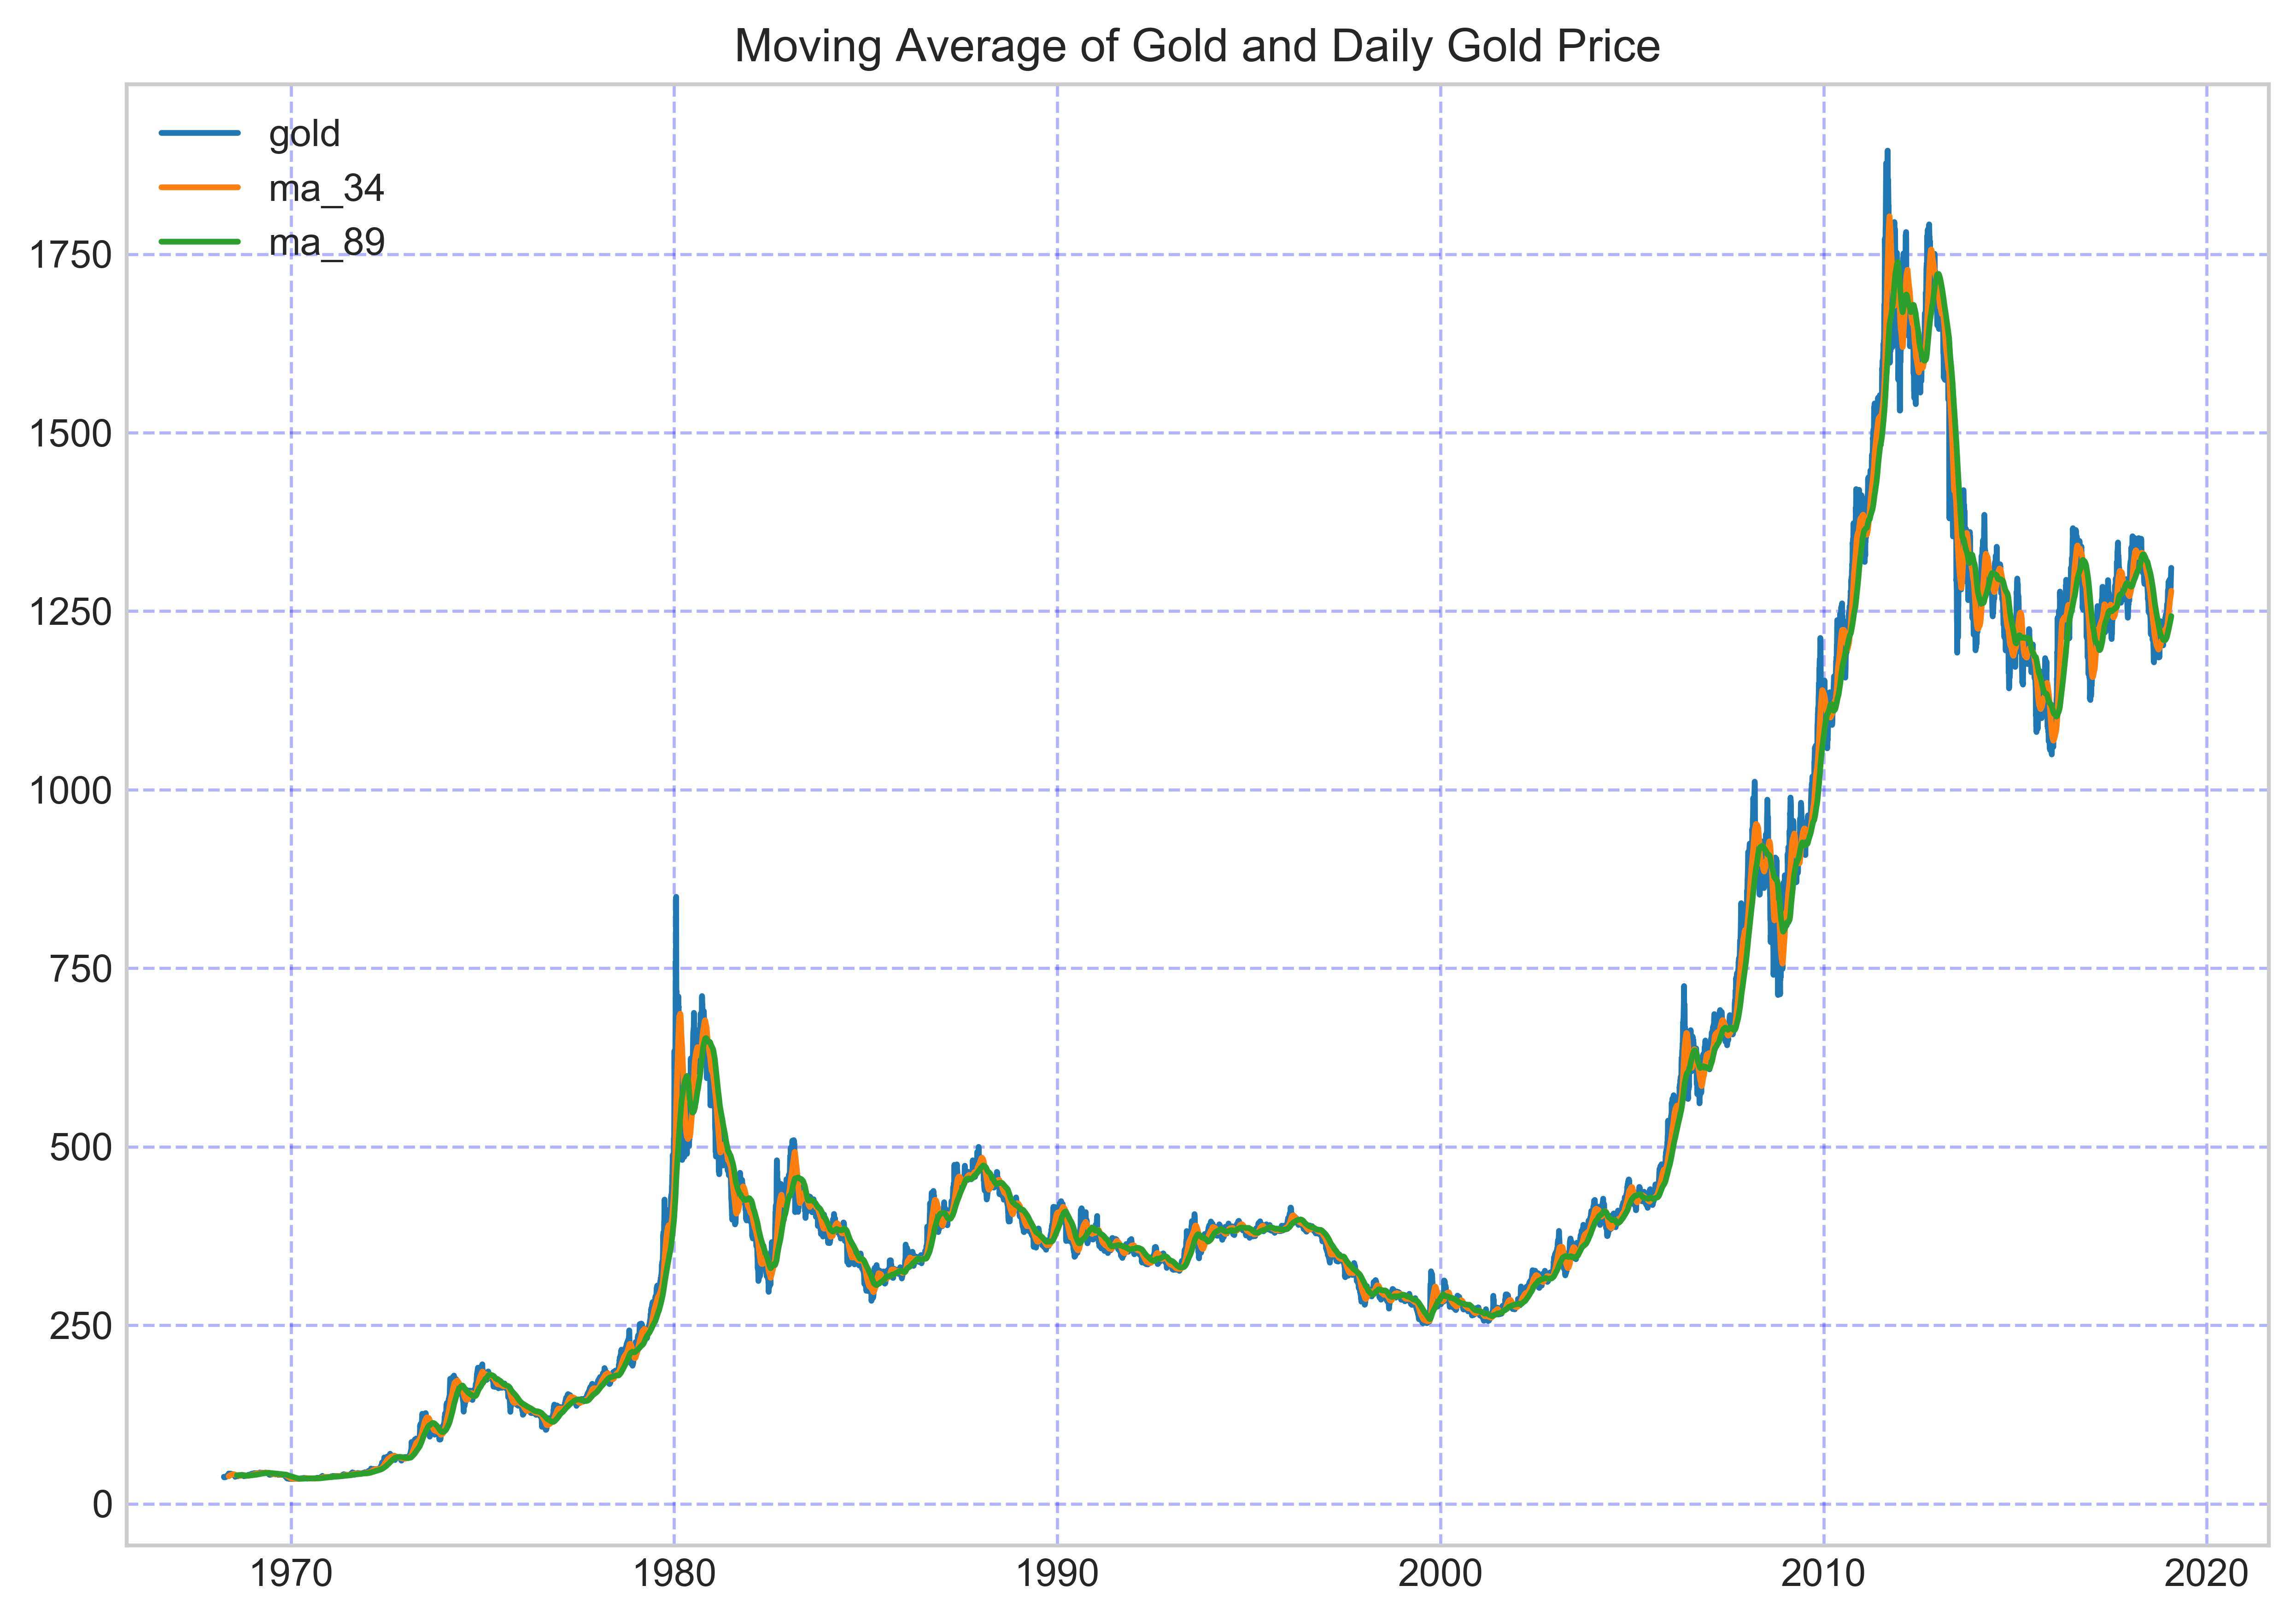

In [47]:
fig, ax1 = plt.subplots()
fig.set_dpi(300)
df[['gold','ma_34','ma_89']].plot(subplots=False,figsize=(10,7),ax=ax1)
ax1.set_title('Moving Average of Gold and Daily Gold Price', fontsize=12)
ax1.grid(linestyle='--',color='blue',alpha=0.3)
ax1.legend(loc='upper left')
plt.show()

### Same plot  yearwise

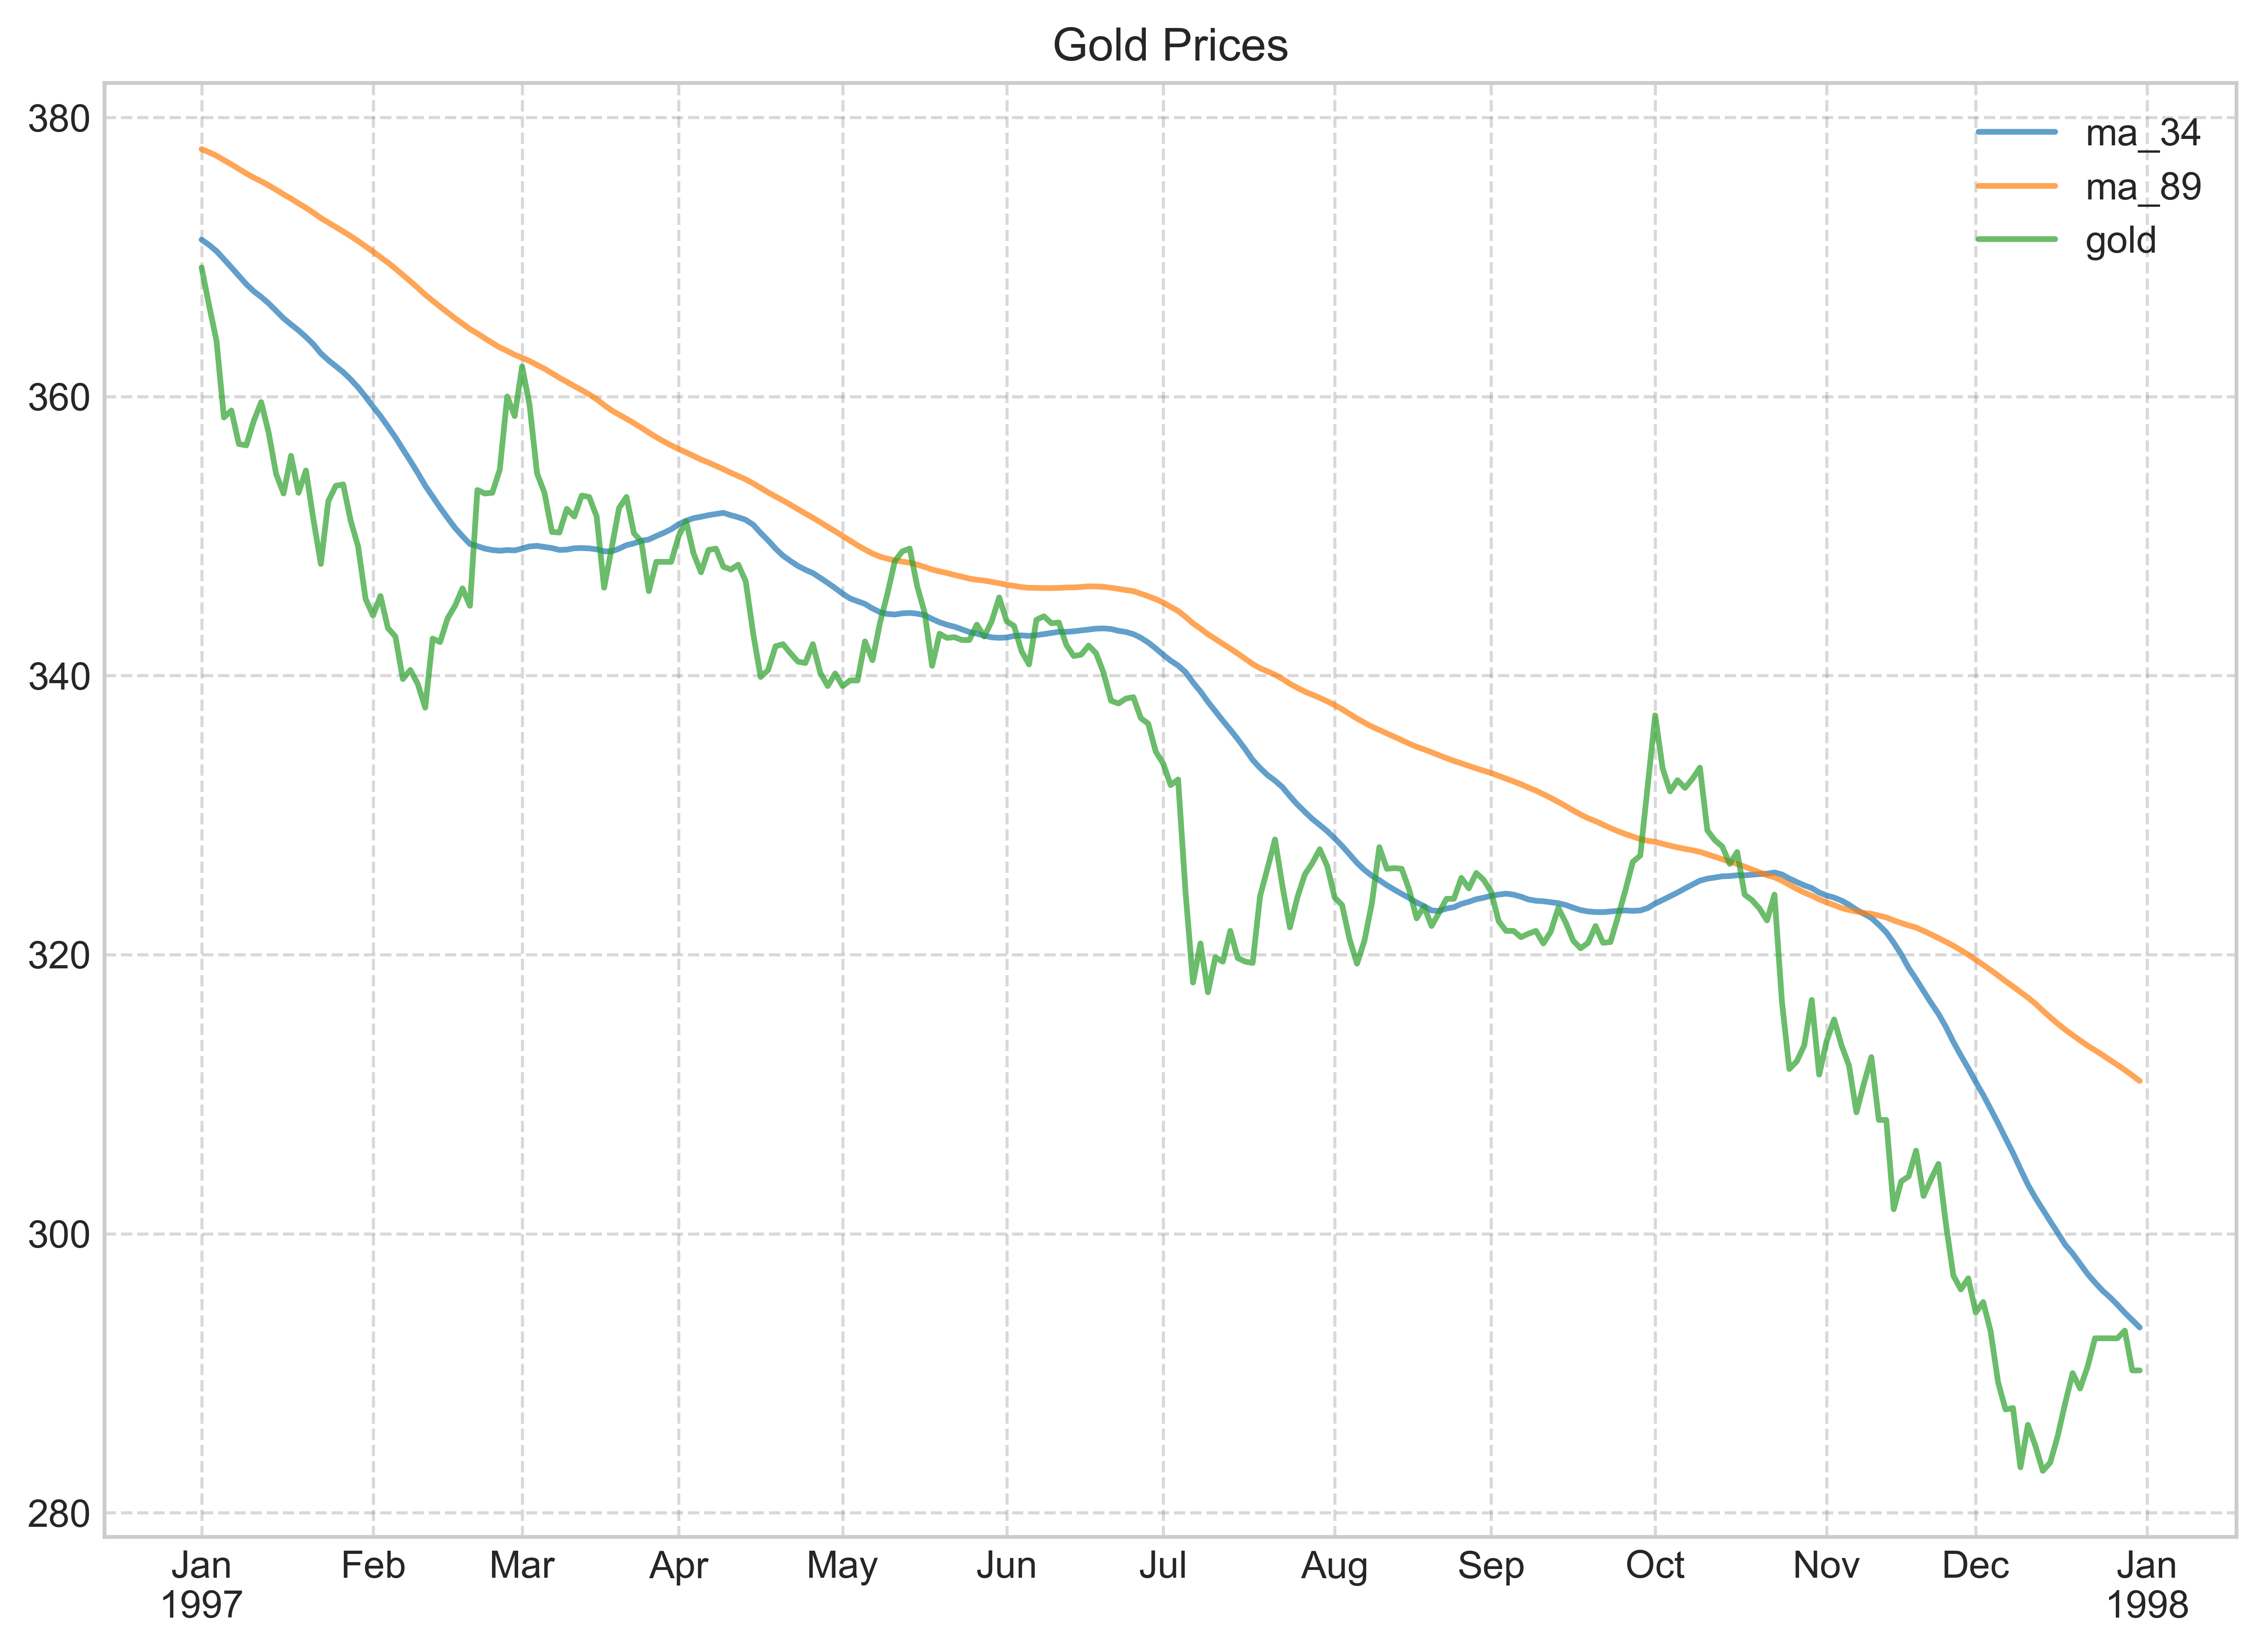

In [48]:
yr = 1997
fig, ax1 = plt.subplots()
fig.set_dpi(300)
df.loc[df.index.year == yr,['ma_34','ma_89','gold']]\
.plot(subplots=False,figsize=(10,7),ax=ax1,alpha=0.7)
ax1.set_title('Gold Prices', fontsize=12)
ax1.grid(linestyle='--',color='gray',alpha=0.3)
plt.show()
#md3.display(fig)

## Look at the differences

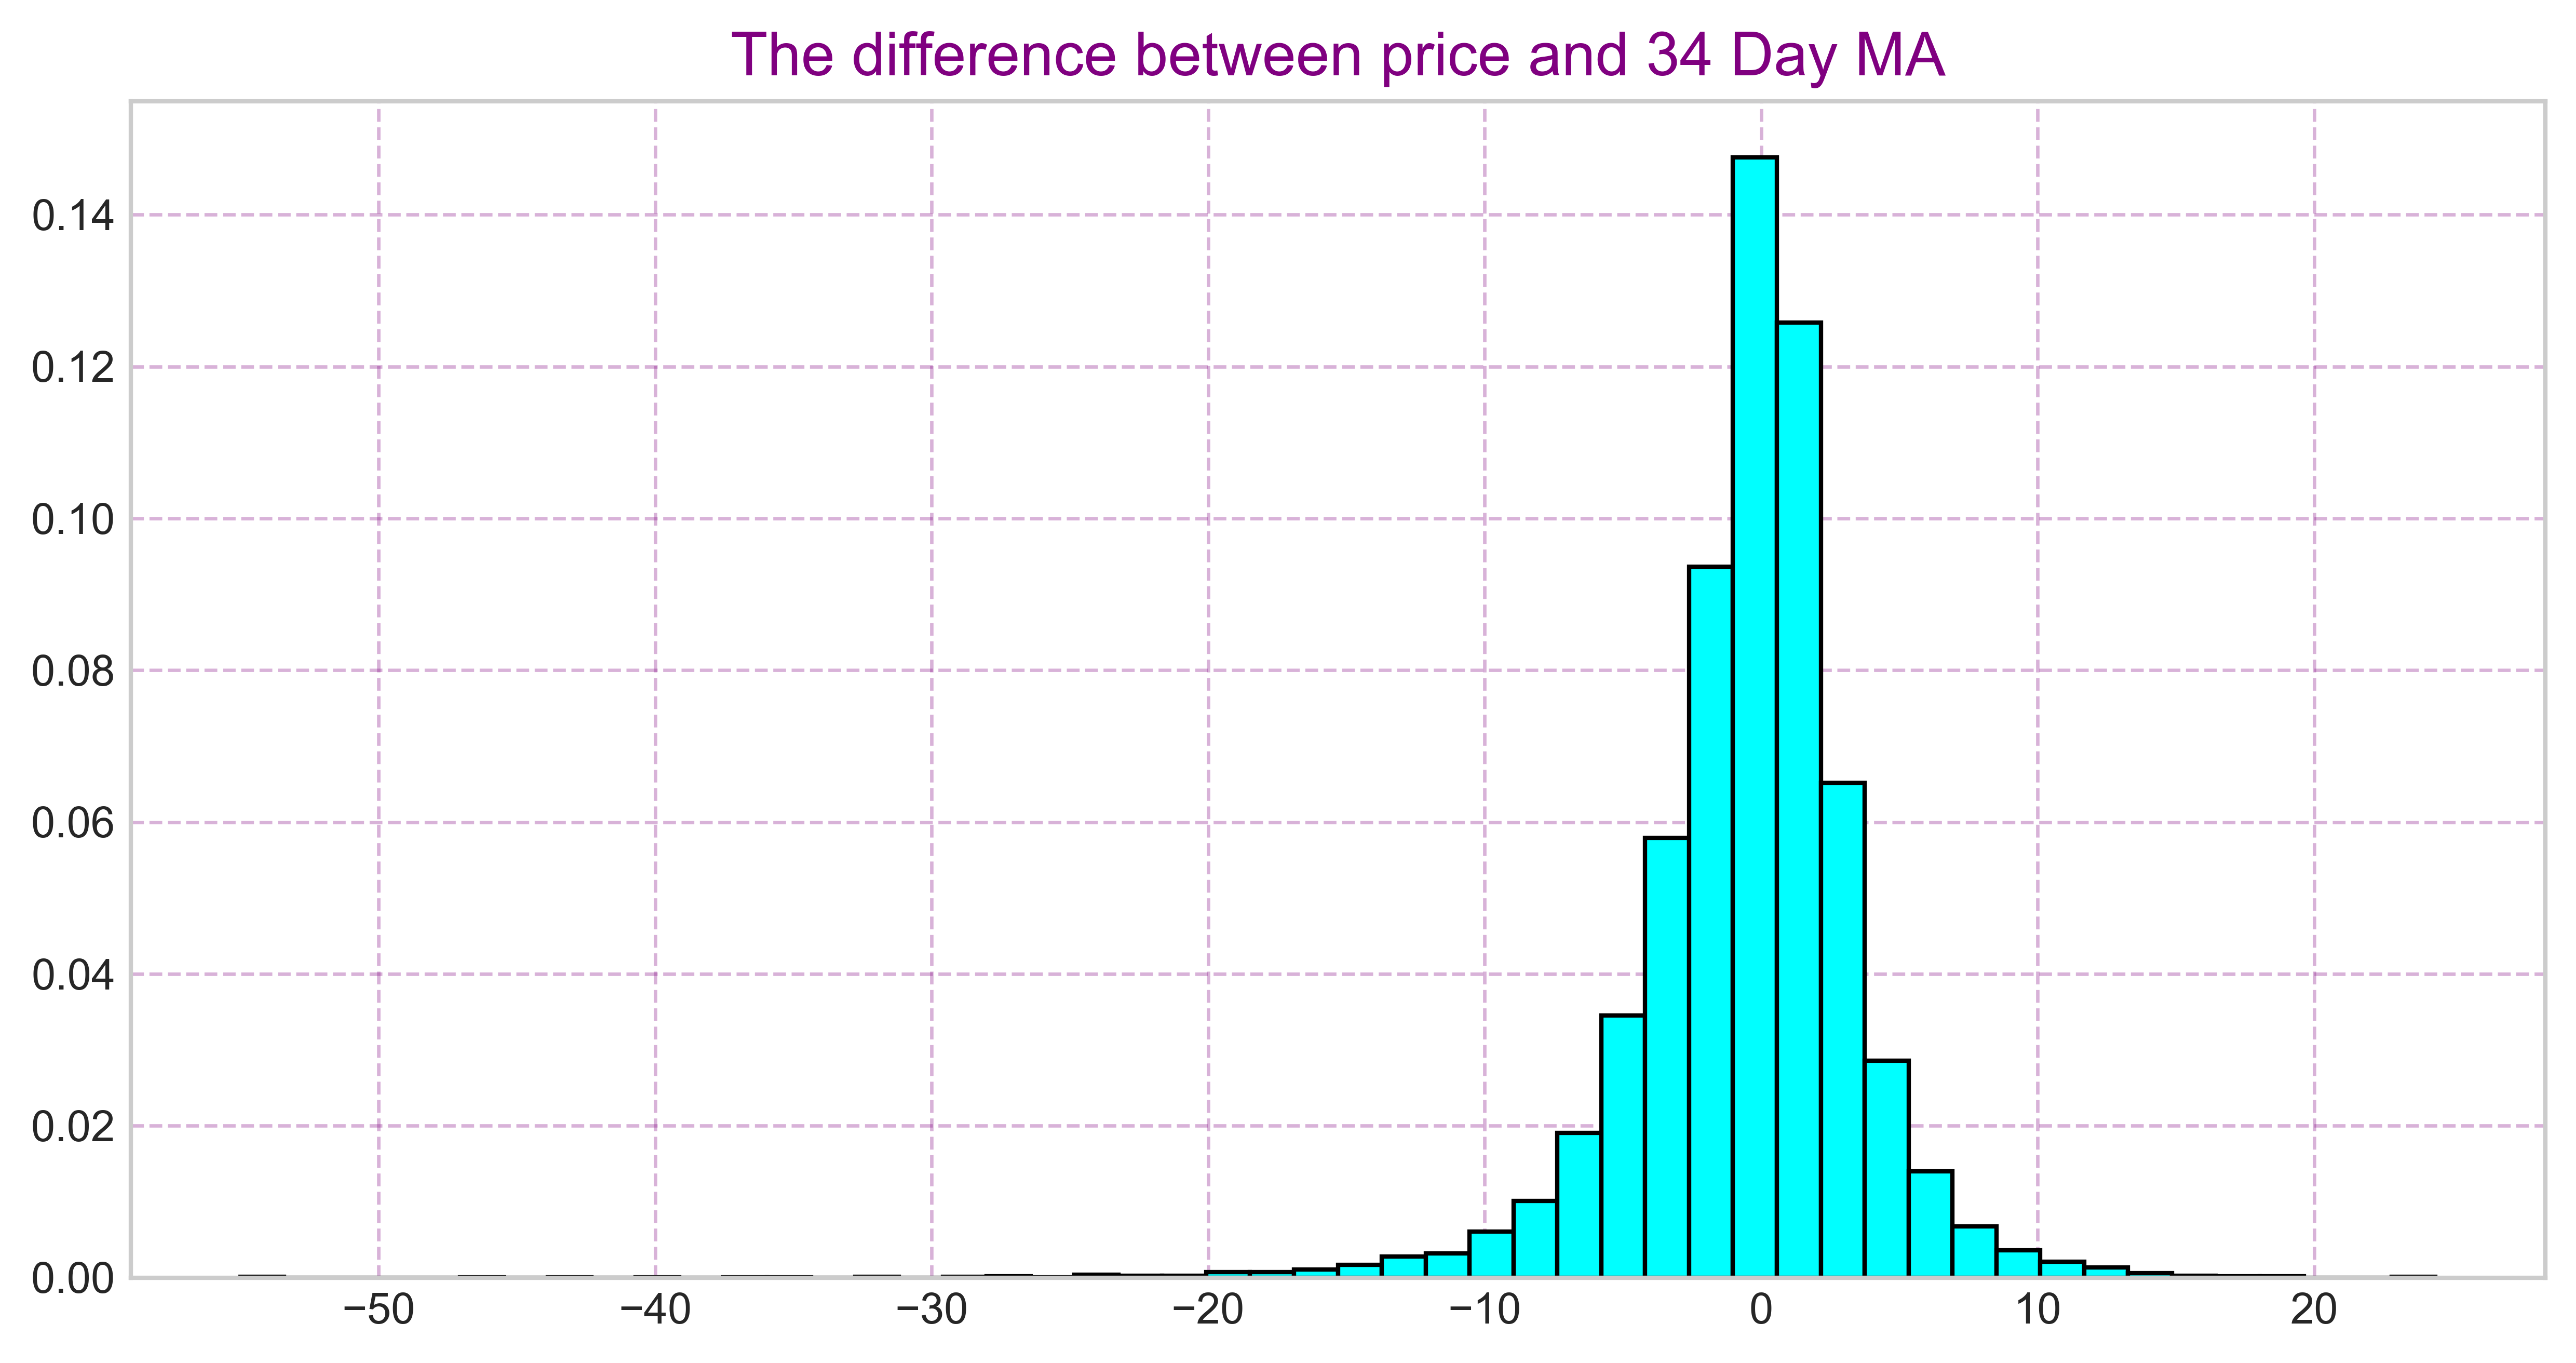

In [49]:
fig, ax = plt.subplots()
fig.set_dpi(300)
#fig.set_facecolor('green')
df.priceGap34.hist(figsize=(10,5),bins=50,fill=True, density = True,\
        color='cyan',edgecolor='black',ax=ax)
ax.set_title('The difference between price and 34 Day MA'\
             ,fontsize=14,color='purple')
ax.grid(linestyle='--',color='purple',alpha=0.3)
plt.show()

In [50]:
np.abs(df.priceGap34).describe()

count    13230.000000
mean         2.774516
std          3.084865
min          0.000000
25%          0.820689
50%          1.879443
75%          3.657988
max         55.000669
Name: priceGap34, dtype: float64

## Time Series

In [51]:
gold = pd.DataFrame(df.dropna()['1970':]['gold'].copy(),columns=['gold'])

In [52]:
gold.head()

,gold
1970-01-01,35.200
1970-01-02,35.075
1970-01-05,35.175
1970-01-06,35.050
1970-01-07,35.000


In [53]:
gold =  computeFractalsAndHurst(gold,'gold')

In [54]:
gold.tail()

,gold,90d_RS,180d_RS,265d_RS,700d_RS,HurstExponent,14d_fractal,34d_fractal,55d_fractal,89d_fractal,180d_fractal
2019-01-24,1283.70,37.023569,77.085157,119.543934,170.777164,0.740059,1.616256,1.355637,1.302238,1.382482,2.023222
2019-01-25,1293.90,37.215008,77.076449,119.477593,170.494057,0.736971,1.703998,1.309854,1.256520,1.359174,1.989911
2019-01-28,1302.15,37.361783,77.038272,119.443951,170.094354,0.734133,1.524026,1.283115,1.230302,1.323657,1.896364
2019-01-29,1307.55,37.450488,76.977545,119.428899,169.604974,0.731753,1.484797,1.248043,1.224478,1.293677,1.759577
2019-01-30,1310.70,37.526140,76.893062,119.483788,169.035718,0.729357,1.361152,1.196354,1.233226,1.292276,1.980635


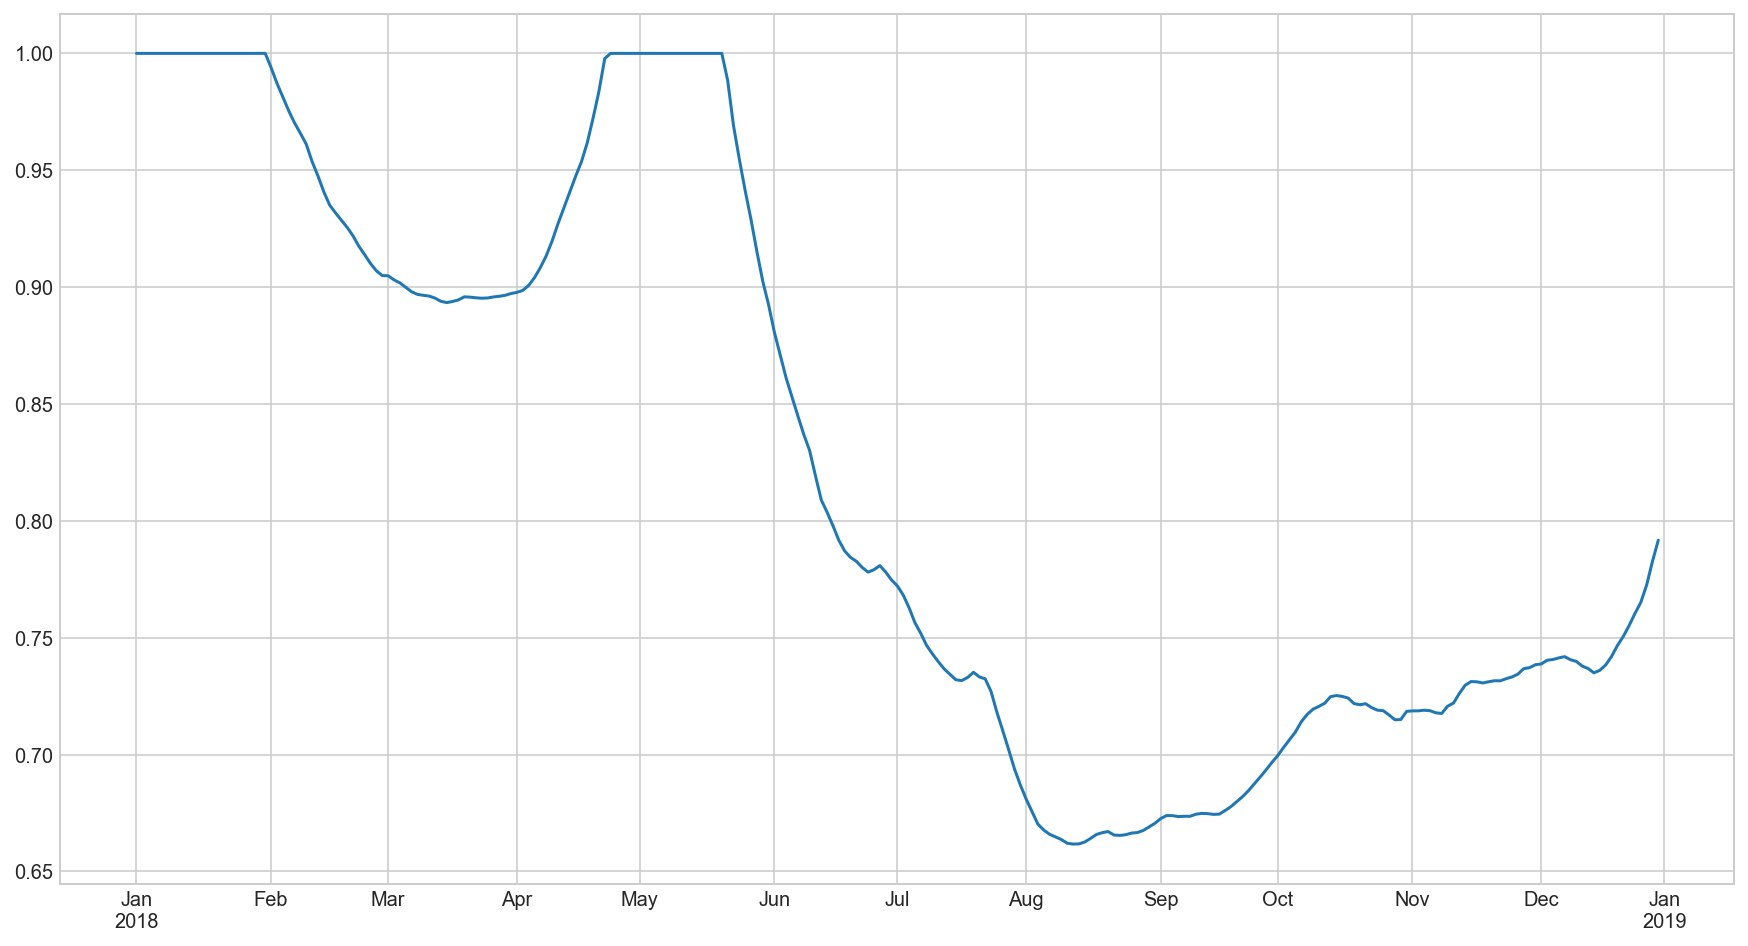

In [60]:
gold['2018'].HurstExponent.plot(figsize=[15,8])

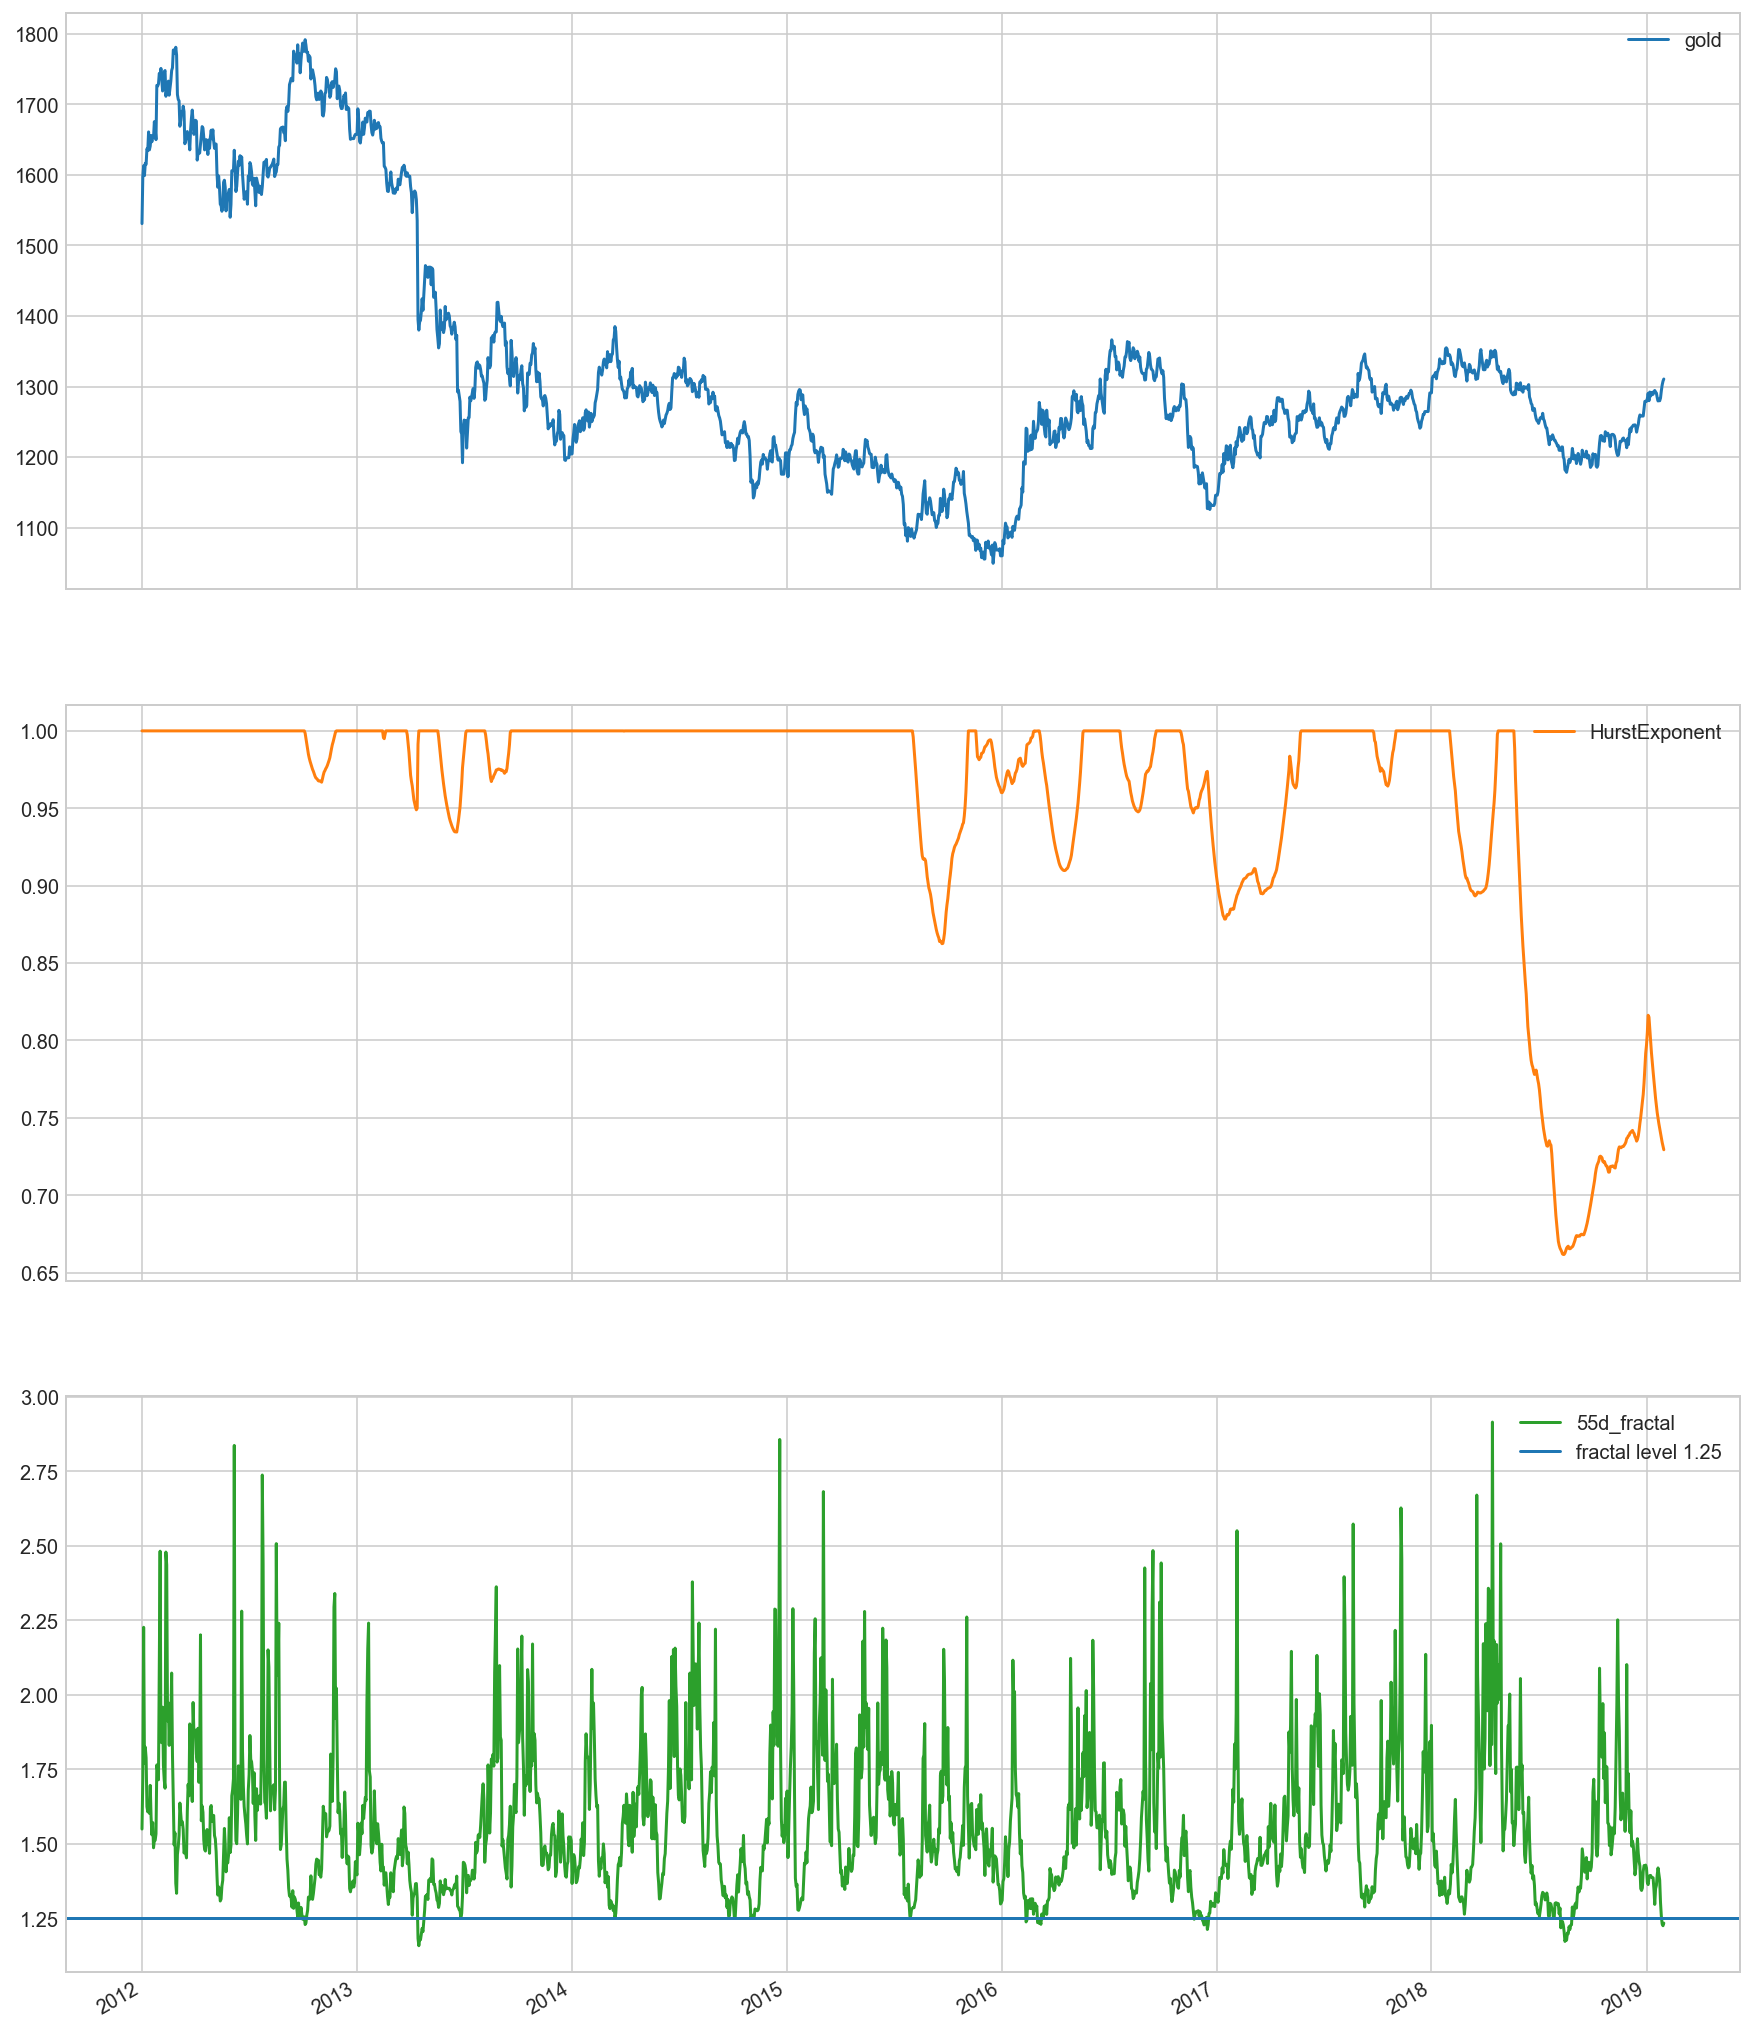

In [61]:
ax = gold[['gold', 'HurstExponent','55d_fractal']]['2012':].\
    plot(figsize=[15,20],subplots=True);
ax[2].axhline(y=1.25,label = 'fractal level 1.25');
ax[2].legend()